# Working with Jupyter Notebooks

A Jupyter Notebook is a web-based application that allows you to create and share documents containing live code, text, visualizations, and other rich media. A cell is the basic unit of interaction in a notebook. A cell can contain code or [markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).


You can select the type of cell from the menu above. 

![](../images/select_cell_type.png)

Then select the '+' from the menu.

If you select **Markdown**, the cell can format text and code. We can use it to add notes, images, and detailed comments in the notebook. A basic cheat sheet as a notebook is [included](Markdown-Cheat-Sheet.ipynb). 

If you select **Code** then you can write Python code and run it in the cell.

Let's look at the example code below. Programs are built from smaller programs called packages. The first thing we do is import the `datetime` package which lets you manipulate dates and time.

The following sections are `functions` is a block of code that runs when called. You can pass data or parameters to the funciton. Functions increase code reusability and readability. Functions follow the `DRY` or "Don't Repeat Yourself" principal which is guideline to avoid code duplication. Functions are defined with `def` keyword, the name of the function followed by parameters, and terminated with a colon. The following code is indented and `return` sends the result back to the code that called the function.

The program flow is:

1. Call the `date` function to get today's date.
2. Call the `format_date_with_ordinal` with today's date.
3. The `format_date_with_ordinal` calls the `ordinal_suffix` function to place the correct suffix for the day.
4. The `format_date_with_ordinal` returns the formated date.
5. The program prints a message with the formatted date.

In [1]:
# This is a code cell. Run this python example by selecting the 'play' icon in the menu

from datetime import date

def ordinal_suffix(day):
    if 10 <= day <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(day % 10, 'th')
    return suffix

def format_date_with_ordinal(date_obj):
    day = date_obj.day
    suffix = ordinal_suffix(day)
    return f"{date_obj.strftime('%B')} {day}{suffix}, {date_obj.year}"

today = date.today()
formatted_date = format_date_with_ordinal(today)
print("\n\n Hello, today is", formatted_date)
print("\n\n")



 Hello, today is April 17th, 2025





# Introduction to Python with obspy

This section demonstrates how to write Python code in a Jupyter Notebook. We'll use a `obspy`, a Python framework (or package) for processing seismic data. It provides parsers for common file formats, clients to access data centers and seismological signal processing routines which allow the manipulation of seismological time series.

We'll start by importing modules from the `obspy` package. It's not necessary to import the entire package, just the function from the module, e.g., `obspy.clients.fdsn`. For a first task, we'll view FDSN data centers that offer data and create a client object that connects to a data center

In [3]:
from obspy.clients.fdsn import Client
from obspy.clients.fdsn.header import URL_MAPPINGS
import warnings
import cartopy

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# lists the data centers and their names
for key in sorted(URL_MAPPINGS.keys()):
    print("{0:<11} {1}".format(key,  URL_MAPPINGS[key]))  

# creates a client that connects to the IRIS data center
client = Client("IRIS")

AUSPASS     http://auspass.edu.au
BGR         http://eida.bgr.de
EIDA        http://eida-federator.ethz.ch
EMSC        http://www.seismicportal.eu
ETH         http://eida.ethz.ch
GEOFON      http://geofon.gfz-potsdam.de
GEONET      http://service.geonet.org.nz
GFZ         http://geofon.gfz-potsdam.de
ICGC        http://ws.icgc.cat
IESDMC      http://batsws.earth.sinica.edu.tw
INGV        http://webservices.ingv.it
IPGP        http://ws.ipgp.fr
IRIS        http://service.iris.edu
IRISPH5     http://service.iris.edu
ISC         http://isc-mirror.iris.washington.edu
KNMI        http://rdsa.knmi.nl
KOERI       http://eida.koeri.boun.edu.tr
LMU         http://erde.geophysik.uni-muenchen.de
NCEDC       https://service.ncedc.org
NIEP        http://eida-sc3.infp.ro
NOA         http://eida.gein.noa.gr
ODC         http://www.orfeus-eu.org
ORFEUS      http://www.orfeus-eu.org
RASPISHAKE  https://fdsnws.raspberryshakedata.com
RESIF       http://ws.resif.fr
RESIFPH5    http://ph5ws.resif.fr
SCEDC  

Notebooks offer flexibility when coding. Typically, it is good practice to import packages and modules at the beginning of a program. A notebook lets you import on-the-fly and maintains the previous import. In this case, we're import `UTCDateTime` from obspy because it is based on high precision timestamp that the Python `datetime` class does not offer.

In [4]:
from obspy import UTCDateTime

## Getting Event Data

We can find events using a start date and end date. If we wanted to find earthquakes in 2020 with a magnitude of 7 or greater, we can use obspy's [`get_events` method](https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html). The method has arguments such as time, coordinates, magnitude, and many others to find earthquakes.

> **Client.get_events**(*starttime=None*, *endtime=None*, *minlatitude=None*, *maxlatitude=None*, *minlongitude=None*, *maxlongitude=None*, *latitude=None*, *longitude=None*, *minradius=None*, *maxradius=None*, *mindepth=None*, *maxdepth=None*, *minmagnitude=None*, *maxmagnitude=None*, *magnitudetype=None*, *eventtype=None*, *includeallorigins=None*, *includeallmagnitudes=None*, *includearrivals=None*, *eventid=None*, *limit=None*, *offset=None*, *orderby=None*, *catalog=None*, *contributor=None*, *updatedafter=None*, *filename=None*, **kwargs)


In [5]:
starttime = UTCDateTime("2020-01-01")
endtime = UTCDateTime("2025-12-31")
catalog = client.get_events(starttime=starttime, endtime=endtime, minmagnitude=7)

The events are stored in a [`Catalog`](https://docs.obspy.org/packages/autogen/obspy.core.event.Catalog.html) which is a list-like container for `events`. The table lists the methods for the Catalog class.

| method | description |
|-|-|
| append | Appends a single Event object to the current Catalog object. |
| clear | Clears event list (convenient method). |
| copy | Returns a deepcopy of the Catalog object. |
| count | Returns the number of Events in the Catalog object. |
| extend | Extends the current Catalog object with a list of Event objects. |
| filter | Returns a new Catalog object only containing Events which match the specified filter rules. |
| plot | Creates preview map of all events in current Catalog object. |
| write | Saves catalog into a file. |


We can list the number of events in a catalog and plot the on a globe.

70


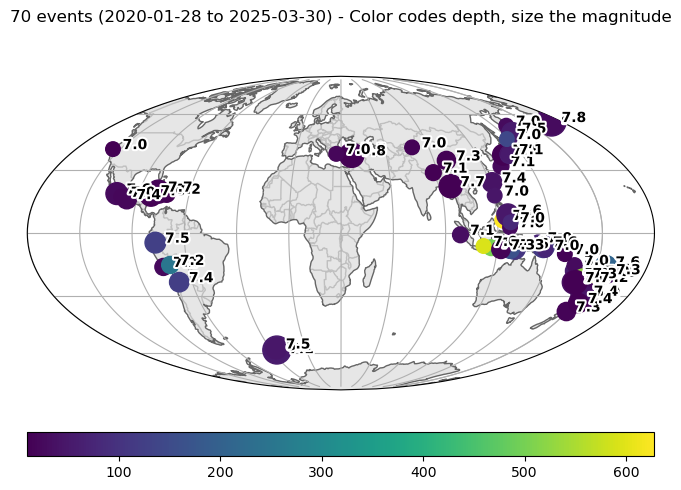

In [6]:
print(catalog.count())
catalog.plot();

Catalogs handle event metadata in a hierarchy that follows the [QuakeML](https://quake.ethz.ch/quakeml/) format. The diagram shows `Event` metadata has `origins` which includes latitude, longitude, depth, and time.

![](../images/Event.png)

Let's get an individual event from the catalog. Catalogs behave like Python lists and we can use the list index to get the time of a single event. The example below, extracts the time for the first event in the catalog 

In [8]:
t = catalog[0].origins[0].time
print(t)

2025-03-30T12:18:47.830000Z


We get a stream of waveforms with the `get_waveforms` method. The method takes several arguments or parameters that are [documented](https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_waveforms.html).

> **Client.get_waveforms**(*network*, *station*, *location*, *channel*, *starttime*, *endtime*, *quality=None*, *minimumlength=None*, *longestonly=None*, *filename=None*, *attach_response=False*, **kwargs)

Using the time from the previous cell, we retrieve data from **IU**, the global network, and use wildcards for the station and location. We specify `LHZ` as the instrument channel and set the time for one minute before the event and fifteen minutes after.

In [10]:
st = client.get_waveforms("IU", "*", "*", "LHZ", t - 60 * 5, t + 60 * 120)
print(st)


136 Trace(s) in Stream:

IU.AFI.00.LHZ | 2025-03-30T12:13:48.069538Z - 2025-03-30T14:18:47.069538Z | 1.0 Hz, 7500 samples
...
(134 other traces)
...
IU.YSS.10.LHZ | 2025-03-30T12:13:48.069538Z - 2025-03-30T14:18:47.069538Z | 1.0 Hz, 7500 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


`get_waveforms` returns a stream which contains a list of `traces`. A trace is gap-less continuous time series and metadata. Let's examine the first trace in the stream and print the metadata using the `stats` method.

In [11]:
print(len(st))
tr = st[0]
print(tr.stats)

136
               network: IU
               station: AFI
              location: 00
               channel: LHZ
             starttime: 2025-03-30T12:13:48.069538Z
               endtime: 2025-03-30T14:18:47.069538Z
         sampling_rate: 1.0
                 delta: 1.0
                  npts: 7500
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 53, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 2866688})
            processing: ['ObsPy 1.4.0: trim(endtime=UTCDateTime(2025, 3, 30, 14, 18, 48, 69538)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2025, 3, 30, 12, 13, 48, 69538))']


`stats` lets you access invidual metadata elements.

In [12]:
print(tr.stats.network)
print(tr.stats.station)

IU
AFI


We can acces the data in a trace with the `data` method. It returns a list of values as a [numpy](https://numpy.org/) array.

In [13]:
print(tr.data)

[ -376  1514  -351 ... -3034 -2805 -1411]


The trace can also be plotted.

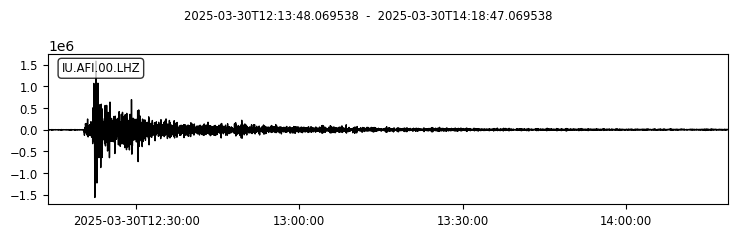

In [14]:
tr.plot();

## Removing Instrument Response

As-is, the trace data doesn't represent ground motion. The data includes instrument response which is a byproduct of how a seismometer converts the analog voltage signal of the instrument of to digital `counts`. To convert the data to actual ground velocity, we have to account for the digitizer and seismometer response to ground motion. The theory and method for removing instrument response is detailed in [Havskov and Alguacil, 2015](https://books.google.com/books?id=5PPuCgAAQBAJ&pg=PA197#v=onepage&q&f=false).

Obspy can download the trace data with the instrument response. When we remove instrument response, the data is converted to displacement, velocity, or acceleration data. We'll use the metadata from the previous trace.



 1 Trace(s) in Stream:
IU.AFI.00.LHZ | 2025-03-30T12:13:48.069538Z - 2025-03-30T14:18:46.069538Z | 1.0 Hz, 7499 samples


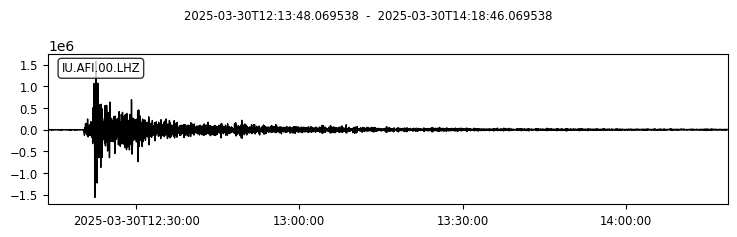

In [15]:
network = st[0].stats.network
station = st[0].stats.station
location = st[0].stats.location
channel = st[0].stats.channel
starttime = UTCDateTime(st[0].stats.starttime)
endtime = UTCDateTime(st[0].stats.endtime)

st = client.get_waveforms(network, station, location, channel, starttime, endtime, attach_response = True)
print("\n", st)
st.plot();

Removing response acts on the data itself and changes it. For each type of output, make a copy of the trace.

In [16]:
# copies the trace and removes instrument response
st_displacement = st.copy()
st_displacement.remove_response(output = 'DISP')

# uncomment these to make a copy of the trace
#st_velocity = st.copy()
#st_acceleration = st.copy()

# uncomment these to remove response for these output units
# st_velocity.remove_response(output = 'VEL')
# st_acceleration.remove_response(output = 'ACC')

1 Trace(s) in Stream:
IU.AFI.00.LHZ | 2025-03-30T12:13:48.069538Z - 2025-03-30T14:18:46.069538Z | 1.0 Hz, 7499 samples

Let's compare the original trace with the removed response for displacement.

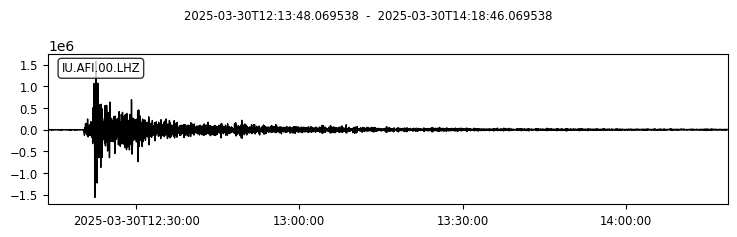

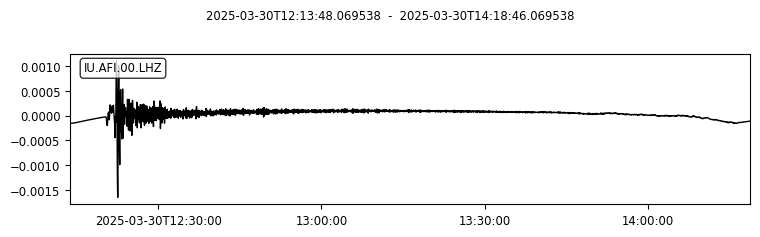

In [17]:
st.plot()
st_displacement.plot(); # units in meters

# uncomment these plots to visualize the waveforms
# st_acceleration.plot(); # units in meters/second^2
# st_velocity.plot(); # units in meters/second


We can plot the deconvolution process (the conversion of the waveform from the time domain to the frequency domain and the removal of instrument response). The charts on the left are in the frequency domain and the charts on the right are the data in the time domain. 

The raw data spectrum decomposes the time series into its constituent frequencies, revealing the amplitude and phase of each frequency component. It indicates how strongly each frequency is represented in the signal and serves as a baseline for comparing the effects of instrument response removal. The second frequency chart shows how applying filters can enhance or suppress specific frequency bands to isolate specific seismic phases or reducing noise. The third chart isolates the ground motion signal from the instrument resonse by multiplying the inverted against the raw data to adjust the amplitude and phase of each frequency component in the raw data, which corrects distortions attributable to the instrument. Note that the `water_level` parameter is used to dampen the effect of small values that can introduce noise to the deconvolution process.

The parameters for the `remove_response` method are:

| parameter | description |
| - | - |
| inventory  (Inventory or None.) | Station metadata to use in search for adequate response. |
| output| Output units |
| | "DISP" | displacement, output unit is meters |
| | "VEL" | velocity, output unit is meters/second |
| | "ACC" | acceleration, output unit is meters/second**2 |
| | "DEF" | default units, the response is calculated in output units/input units. |
| water_level | Water level for deconvolution. |
| pre_filt |  Apply a bandpass filter in frequency domain to the data before deconvolution. The list or tuple defines the four corner frequencies (f1, f2, f3, f4) of a cosine taper which is one between f2 and f3 and tapers to zero for f1 < f < f2 and f3 < f < f4. |
| zero_mean | If True, the mean of the waveform data is subtracted in time domain prior to deconvolution. |
| taper | If True, a cosine taper is applied to the waveform data in time domain prior to deconvolution. |
| taper_fraction | Taper fraction of cosine taper to use. |
| plot | If True, brings up a plot that illustrates how the data are processed in the frequency domain. |



1 Trace(s) in Stream:
IU.AFI.00.LHZ | 2025-03-30T12:13:48.069538Z - 2025-03-30T14:18:46.069538Z | 1.0 Hz, 7499 samples

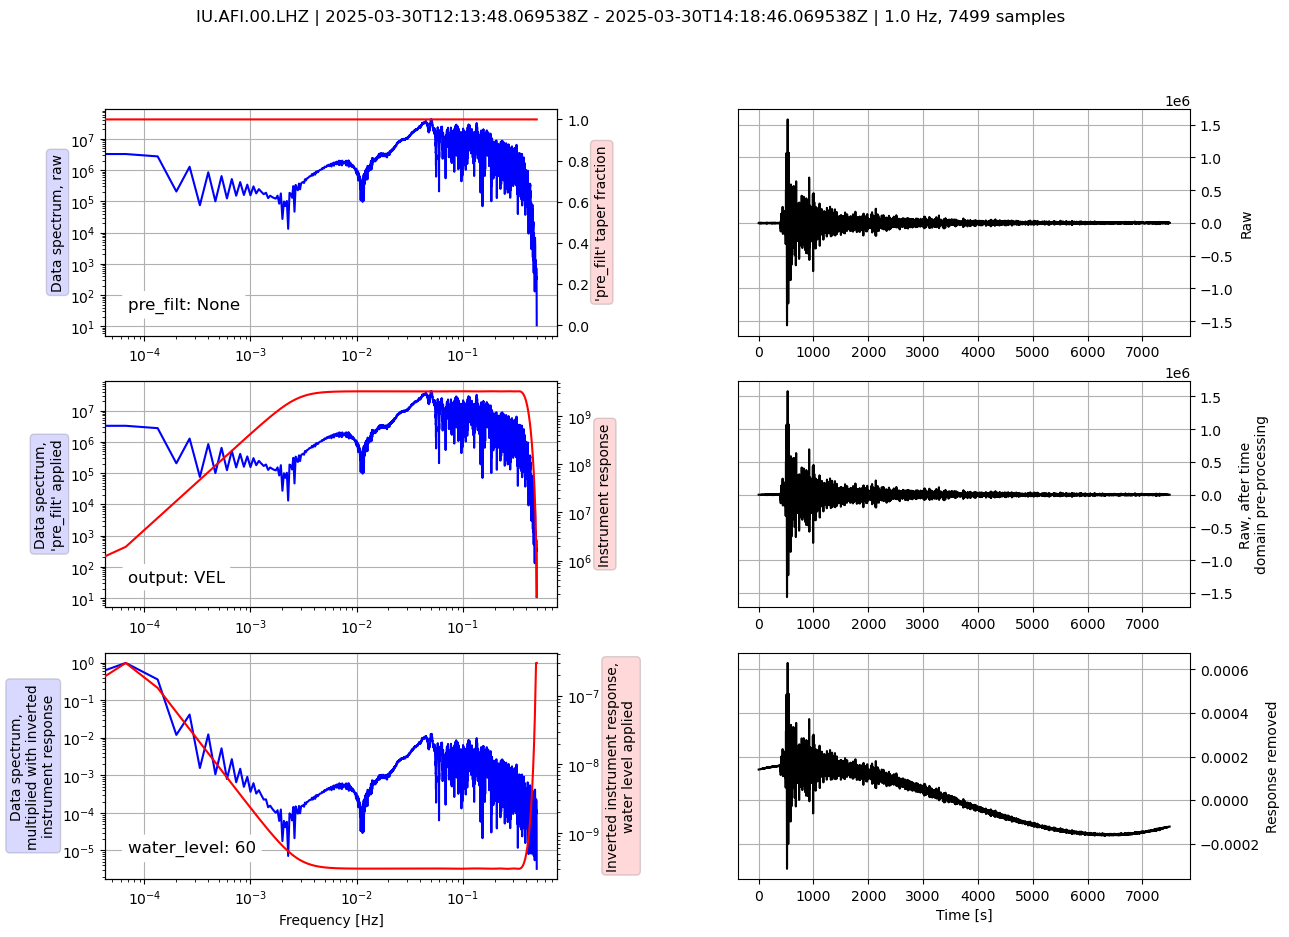

In [18]:
st_velocity = st.copy()
st_velocity.remove_response(output = 'VEL', plot = True)


## Manipulating Seismic Data

##### The stream and trace objects in Obspy both have public methods that can modify the data. Documentation:

- [traces](https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.html#obspy.core.trace.Trace)
- [streams](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html). 
           
There are shared methods between streams and traces, and methods specific to each. Let's look at three shared operations: filtering, trimming, and changing sampling rate.

### Filtering

Filtering extracts a specific frequency range in a trace or stream. There are many different filter methods available which are described in the [documentation](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.filter.html#obspy.core.stream.Stream.filter).

1. bandpass
2. bandstop
3. lowpass
4. highpass
5. lowpass_cheby_2
6. lowpass_fir (experimental)
7. remez_fir (experimental)

Like `remove_response`, filter operations change the original data and you should copy the stream or trace to retain the unfiltered data for comparison. We can use a bandpass filter to extract the range of frequencies of interest. Let's extract microseismic activity or the hum at [0.003 Hz and 0.015 Hz](https://progearthplanetsci.springeropen.com/articles/10.1186/s40645-023-00587-7).

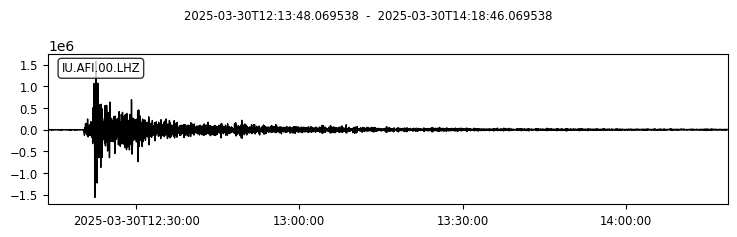

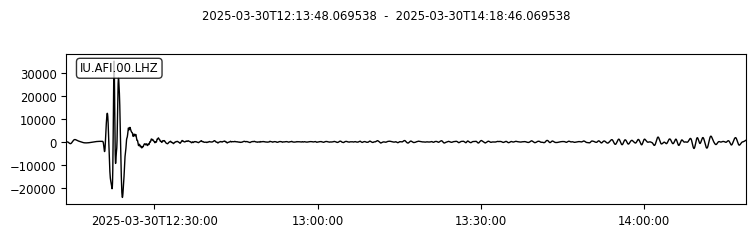

In [19]:
# copy raw data
tr = st[0]
tr_filt = tr.copy()

# apply filter
tr_filt.filter("bandpass", freqmin=0.003, freqmax=0.015)

# plot the trace
tr.plot()
tr_filt.plot();

### Trimming

If we want to focus on just the event we can reduce the amount of data by trimming the stream. The ["trim"](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.trim.html#obspy.core.stream.Stream.trim) method can set start and end times for and event. Let's trim the data to 30 minutes before the event and 30 minutes after. To do this, we need the start and end times of the stream in UTCDateTime. Previously, we used the stats method to get the metadata.

In [20]:
print(st[0].stats.starttime)
print(st[0].stats.endtime)

2025-03-30T12:13:48.069538Z
2025-03-30T14:18:46.069538Z


Set the new start and end times to 30 minutes before and after. Copy the stream before trimming to keep the original data.

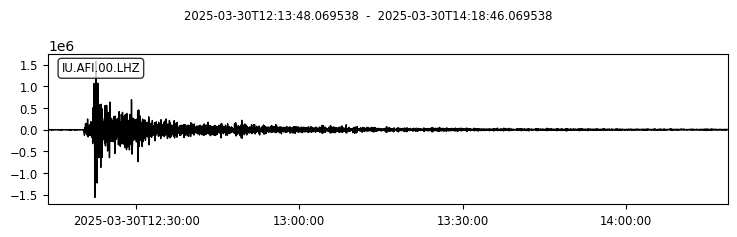

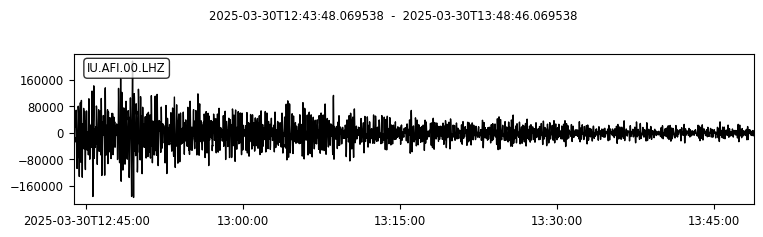

In [21]:
starttime = st[0].stats.starttime + 60 * 30
endtime = st[0].stats.endtime - 60 * 30

tr_trim = tr.copy()

tr_trim.trim(starttime=starttime, endtime=endtime)

tr.plot()
tr_trim.plot();

### Sampling Rates

Seismic data is resampled for several reasons. If the sampling frequency is high, you might want to reduce or decimate the data. Alternatively, you can increase the sampling rate by interpolating values or resampling the data using the Fourier Method. Increasing the sampling frequency can avoid distortions in the data when the sampling frequency is below the [Nyquist frequency](https://www.geeksforgeeks.org/nyquist-sampling-rate-and-nyquist-interval/). There three methods available in obspy:

- [decimate](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.decimate.html#obspy.core.stream.Stream.decimate): downsamples by an integer factor
- [interpolate](https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.interpolate.html#obspy.core.trace.Trace.interpolate): increase sampling rate by interpolation
- [resample](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.resample.html#obspy.core.stream.Stream.resample): resamples data using a Fourier method

Let's increase the trimmed trace sampling rate by interpolation. We can find the original sampling rate in the trace metadata.

In [ ]:
print("\nOriginal sampling rate: ",tr_trim.stats.sampling_rate)

As with previous operations, make a copy of the data then apply resampling. Interpolation has many options, consult the documention for the appropriate method.

In [ ]:
# copy the trace
tr_resample = tr_trim.copy()

# resample by interpolation
tr_resample.interpolate(sampling_rate=2, method="lanczos", a=20)

# plot the orignal trace and the resampled trace
tr_trim.plot()
print("\nOriginal sampling rate: ",tr)
tr_resample.plot();
print("\nNew sampling rate: ", tr_resample)

## Federated Routing Client (Optional)

If you want to query more than one data center, the federated routing client supports getting station and waveform data from multiple data centers. There are two federated routing web services, [IRISWS](https://service.iris.edu/irisws/fedcatalog/1/) and [EIDAWS](https://www.orfeus-eu.org/data/eida/webservices/routing/) that returns selected time series channels from across multiple FDSN or EIDA data centers. The interface is primarily designed for discovery of data channels, the subsequent requesting of time series using web service interfaces, and it is capable of removing overlap from the channel list when the same channels are available from multiple data centers, avoiding the request and processing of duplicate data.

In this section we'll use the federated routing client to find data.

In [ ]:
from obspy.clients.fdsn import RoutingClient
client = RoutingClient("iris-federator")
print(type(client))

The federated routing client can search and retrieve streams. The example below demonstrates how to retrieve streams.

In [ ]:
stream = client.get_waveforms(
    channel="LHZ", starttime=UTCDateTime(2025, 3, 17),
    endtime=UTCDateTime(2025, 3, 18), latitude=-2.872, longitude=130.161,
    maxradius=2, extended=True)  
print(stream)

We can find stations by coordinates and channel.

In [ ]:
inv = client.get_stations(
    starttime=UTCDateTime(2025, 3, 17),
    endtime=UTCDateTime(2025, 3, 18), latitude=-2.872,
    level="channel", longitude=130.161, maxradius=2)  
print(inv)
inv.plot();

We can find stations by network and station.

In [ ]:
inventory = client.get_stations(network="GE", station="B*",
                                starttime=UTCDateTime("2025-03-17"),
                                endtime=UTCDateTime("2025-03-18"),
                                level="response")
print(inventory)

In [ ]:
inventory.plot();

However, federated routing does not support finding and retrieving events. We have to use the client interface.

In [ ]:
client = Client("IRIS")
cat = client.get_events(starttime=UTCDateTime("2025-03-17"),
                        endtime=UTCDateTime("2025-03-18"), 
                        minmagnitude=4, latitude=-2.872,
                        longitude=130.161, maxradius=1)
print(cat)
cat.plot();

We don't know which station has stream data, but `get_waveforms` accepts wildcards for station and location. 

In [ ]:
t = UTCDateTime("2025-03-17T17:32:17.163000Z")
st = client.get_waveforms("GE", "*", "*", "LHZ", t - 60 * 60, t + 60 * 60)
st.plot()